In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Pytorch/Pytorch Tutorial'
!ls

/content/drive/MyDrive/Pytorch/Pytorch Tutorial
 Autograd.ipynb   'Linear regression.ipynb'
 data_linear.csv  'Torch Linear Regression.ipynb'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# load dữ liệu, chuyển về dạng numpy
data = pd.read_csv('data_linear.csv').values

In [ ]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)
y = y.unsqueeze(1)

In [ ]:
# Hàm training
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(1, n_epochs + 1):
      y_hat = model(x)
      print(y_hat.shape, y.shape)
      loss = loss_fn(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if epoch % 1 == 0:
              losses.append(loss.item())
              print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return losses

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=0.00004)

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[14.9464]], requires_grad=True), Parameter containing:
 tensor([1.1261], requires_grad=True)]

In [ ]:
loss = training_loop(
  n_epochs = 10,
  optimizer = optimizer,
  model = linear_model,
  loss_fn = nn.MSELoss(),
  x = x, 
  y = y
)

torch.Size([30, 1]) torch.Size([30, 1])
Epoch 1, Loss 1197862.125000
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 2, Loss 471079.875000
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 3, Loss 185353.312500
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 4, Loss 73023.078125
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 5, Loss 28861.699219
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 6, Loss 11500.138672
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 7, Loss 4674.631348
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 8, Loss 1991.258057
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 9, Loss 936.317261
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 10, Loss 521.580505


Text(0, 0.5, 'loss')

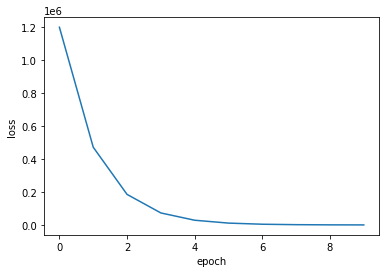

In [ ]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')

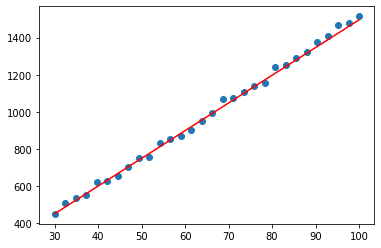

In [ ]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)

with torch.no_grad():
    y_hat = linear_model(x)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')